In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso


In [77]:
Data = pd.read_csv('P.csv')
Data.head()

,gender,parents visit,parental level of education,restoration,test preparation course,score math,reading score,score bac
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
Data = Data.dropna()

In [79]:
Data

,gender,parents visit,parental level of education,restoration,test preparation course,score math,reading score,score bac
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
964,male,group A,high school,standard,none,63,63,62
965,male,group C,high school,free/reduced,none,62,55,55
966,female,group C,high school,free/reduced,completed,59,71,65
967,female,group D,some college,standard,completed,68,78,77


In [80]:
Data.drop(['reading score','parents visit'],  axis=1, inplace=True)
Data

,gender,parental level of education,restoration,test preparation course,score math,score bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75
...,...,...,...,...,...,...
964,male,high school,standard,none,63,62
965,male,high school,free/reduced,none,62,55
966,female,high school,free/reduced,completed,59,65
967,female,some college,standard,completed,68,77


In [81]:
Data.columns = [each.split()[0] + "_" + each.split()[1] if (len(each.split()) > 1) else each for each in Data.columns ]
print(Data.columns)

Index(['gender', 'parental_level', 'restoration', 'test_preparation',
       'score_math', 'score_bac'],
      dtype='object')


In [82]:
Data

,gender,parental_level,restoration,test_preparation,score_math,score_bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75
...,...,...,...,...,...,...
964,male,high school,standard,none,63,62
965,male,high school,free/reduced,none,62,55
966,female,high school,free/reduced,completed,59,65
967,female,some college,standard,completed,68,77


In [83]:
Data

,gender,parental_level,restoration,test_preparation,score_math,score_bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75
...,...,...,...,...,...,...
964,male,high school,standard,none,63,62
965,male,high school,free/reduced,none,62,55
966,female,high school,free/reduced,completed,59,65
967,female,some college,standard,completed,68,77


Text(0, 0.5, 'Score Bac')

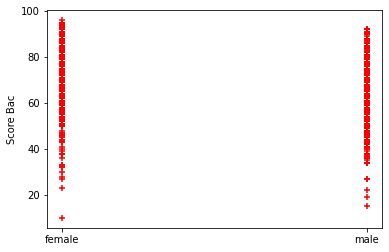

In [84]:
plt.scatter(Data.gender,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

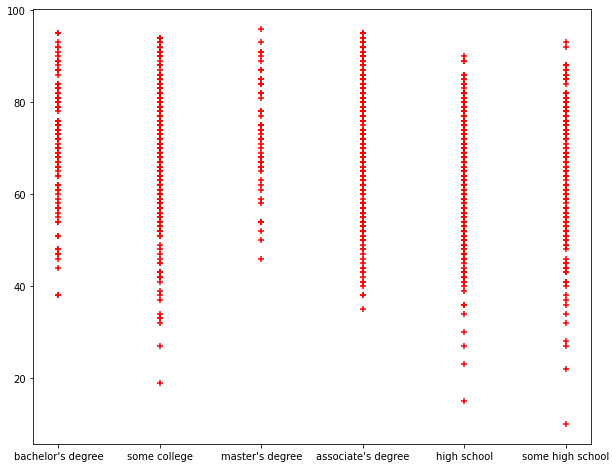

In [85]:
fig = plt.figure(figsize=(10,8))
plt.scatter(Data.parental_level,Data.score_bac,marker='+',color='red')

Text(0, 0.5, 'Score Bac')

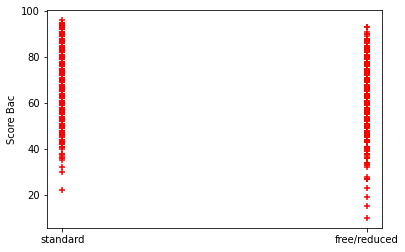

In [86]:
plt.scatter(Data.restoration,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

Text(0, 0.5, 'Score Bac')

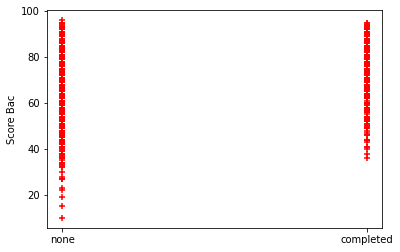

In [87]:
plt.scatter(Data.test_preparation,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

Text(0, 0.5, 'Score Bac')

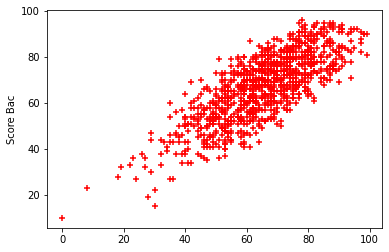

In [88]:
plt.scatter(Data.score_math,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

In [89]:
X = Data.iloc[:,:-1]
Y = Data.iloc[:,-1]

In [90]:
X

,gender,parental_level,restoration,test_preparation,score_math
0,female,bachelor's degree,standard,none,72
1,female,some college,standard,completed,69
2,female,master's degree,standard,none,90
3,male,associate's degree,free/reduced,none,47
4,male,some college,standard,none,76
...,...,...,...,...,...
964,male,high school,standard,none,63
965,male,high school,free/reduced,none,62
966,female,high school,free/reduced,completed,59
967,female,some college,standard,completed,68


In [91]:
Y

0      74
1      88
2      93
3      44
4      75
       ..
964    62
965    55
966    65
967    77
968    86
Name: score_bac, Length: 969, dtype: int64

In [92]:
Data.columns = [each.split()[0] + "_" + each.split()[1] if (len(each.split()) > 1) else each for each in Data.columns ]
print(Data.columns)

Index(['gender', 'parental_level', 'restoration', 'test_preparation',
       'score_math', 'score_bac'],
      dtype='object')


In [93]:
Data.head()

,gender,parental_level,restoration,test_preparation,score_math,score_bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75


In [94]:
X['gender'].replace( 'female', 0 ,inplace=True)
X['gender'].replace( 'male', 1 ,inplace=True)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [95]:
# dfle = Data
# dfle.gender = le.fit_transform(dfle.gender)
# # dfle.race/ethnicity = le.fit_transform(dfle.race/ethnicity)
# # dfle.parental_level = le.fit_transform(parental_level)
# # dfle.lunch = le.fit_transform(lunch)
# # dfle.test_preparation = le.fit_transform(test_preparation)
# dfle

In [96]:
X['test_preparation'].replace( 'none', 0 ,inplace=True)
X['test_preparation'].replace( 'completed', 1 ,inplace=True)

In [97]:
X['parental_level'].replace( 'bachelor\'s degree', 1 ,inplace=True)
X['parental_level'].replace( 'some college', 2 ,inplace=True)
X['parental_level'].replace( 'master\'s degree', 3 ,inplace=True)
X['parental_level'].replace( 'associate\'s degree', 4 ,inplace=True)
X['parental_level'].replace( 'high school', 5 ,inplace=True)
X['parental_level'].replace( 'some high school', 6 ,inplace=True)

In [98]:
# X['parents visit'].unique()

In [99]:
# X['parents visit'].replace( 'group A', 1 ,inplace=True)
# X['parents visit'].replace( 'group B', 2 ,inplace=True)
# X['parents visit'].replace( 'group C', 3 ,inplace=True)
# X['parents visit'].replace( 'group D', 4 ,inplace=True)
# X['parents visit'].replace( 'group E', 5 ,inplace=True)

In [100]:
X['restoration'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [101]:
X['restoration'].replace( 'standard', 0 ,inplace=True)
X['restoration'].replace( 'free/reduced', 1 ,inplace=True)

In [102]:
X

,gender,parental_level,restoration,test_preparation,score_math
0,0,1,0,0,72
1,0,2,0,1,69
2,0,3,0,0,90
3,1,4,1,0,47
4,1,2,0,0,76
...,...,...,...,...,...
964,1,5,0,0,63
965,1,5,1,0,62
966,0,5,1,1,59
967,0,2,0,1,68


In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [104]:
X_train


,gender,parental_level,restoration,test_preparation,score_math
525,1,1,0,1,85
304,0,4,0,0,73
719,0,5,0,0,81
198,1,2,0,0,59
471,1,5,0,0,59
...,...,...,...,...,...
151,0,2,0,1,70
59,0,6,1,0,0
118,1,4,0,1,91
928,1,4,0,0,72


In [105]:
Y_train

525    71
304    80
719    82
198    42
471    46
       ..
151    88
59     10
118    92
928    62
63     71
Name: score_bac, Length: 775, dtype: int64

In [106]:
model = Lasso()
model.fit(X_train,Y_train)

Lasso()

In [107]:
# regressor = LinearRegression()
#
# regressor.fit(X_train,Y_train)


In [108]:
Y_pred=model.predict(X_test)

In [109]:
Y_pred

array([62.51297895, 73.16721145, 67.72630834, 85.27489524, 72.55001566,
       72.72739418, 52.16522943, 61.99327927, 69.21662533, 80.39055752,
       78.13143158, 32.73670347, 80.00419213, 60.64739692, 68.16286894,
       68.10549522, 58.77463637, 78.72286201, 83.34476097, 54.67243709,
       77.17191462, 68.11267373, 72.17082878, 62.89934434, 70.6198814 ,
       65.84636928, 54.38031114, 98.84846616, 78.43073605, 68.53813398,
       60.41264468, 71.97294226, 59.23696234, 72.20769449, 77.26223222,
       66.90730419, 59.62332773, 64.44311321, 59.82839276, 65.26929588,
       68.83743845, 58.27744538, 51.33904676, 73.31164609, 61.46640107,
       59.52908829, 92.44804609, 73.31882461, 71.38869034, 62.51297895,
       50.43690352, 58.71008414, 60.58284468, 59.23696234, 61.46640107,
       88.93009873, 65.56142184, 72.49982045, 60.79183156, 47.10351319,
       74.13065025, 52.74230283, 37.13102871, 48.97627373, 71.38869034,
       77.47121909, 80.39773603, 52.15805091, 62.08034019, 63.78

In [110]:
#Y_pred=regressor.predict(X_test)

In [111]:
# Y_pred

In [112]:
Y_test

212    70
745    75
421    70
481    90
464    66
       ..
514    43
862    59
893    67
306    68
870    38
Name: score_bac, Length: 194, dtype: int64

In [113]:
Y_test.to_numpy()

array([70, 75, 70, 90, 66, 86, 60, 68, 72, 81, 81, 22, 76, 57, 69, 64, 60,
       84, 81, 44, 88, 72, 74, 64, 76, 68, 47, 90, 78, 66, 54, 74, 55, 78,
       85, 68, 69, 61, 54, 61, 70, 47, 49, 82, 70, 58, 91, 84, 78, 59, 60,
       56, 51, 49, 53, 92, 65, 78, 68, 44, 80, 37, 27, 52, 75, 80, 85, 40,
       62, 79, 69, 70, 78, 66, 54, 45, 63, 43, 65, 46, 71, 66, 93, 74, 27,
       43, 89, 81, 56, 78, 84, 82, 63, 69, 86, 43, 56, 66, 43, 79, 92, 62,
       67, 67, 70, 57, 55, 75, 73, 54, 73, 71, 68, 82, 62, 69, 64, 58, 62,
       66, 85, 67, 74, 39, 58, 92, 78, 66, 83, 54, 42, 73, 69, 39, 84, 69,
       65, 72, 43, 62, 50, 87, 79, 15, 83, 78, 72, 52, 84, 43, 55, 71, 76,
       81, 77, 70, 60, 76, 83, 70, 66, 68, 70, 55, 57, 71, 53, 74, 51, 52,
       74, 84, 69, 64, 37, 77, 41, 85, 51, 49, 69, 67, 63, 75, 65, 81, 65,
       70, 38, 43, 59, 67, 68, 38], dtype=int64)

In [114]:
 model.score(X_test,Y_test)

0.8096322912189541

In [115]:
 #regressor.score(X_test,Y_test)

In [116]:
# model.score(X_test,Y_test)

In [117]:
 #regressor.score(X_test,Y_test)

In [118]:
#regressor.predict([[0,1,1,1,60]])